In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
df=pd.read_excel("World military power.xlsx")

In [4]:
df.head()

,2020 ranking,Unnamed: 1,Airforce Strength,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 50,Unnamed: 51,Geography,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
0,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987
2,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,...,Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691
3,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734
4,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,Angola,5369


In [8]:
df.columns

Index(['2020 ranking', 'Unnamed: 1', 'Airforce Strength', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Land Strength',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Navy Strength', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Finances', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Logistics', 'Unnamed: 41',
       'Natural resources', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Manpower', 'Unnamed: 49', 'Unnamed: 50',
       'Unnamed: 51', 'Geography', 'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55',
       'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59'],
  

In [9]:
df.isnull().sum()

2020 ranking          0
Unnamed: 1            0
Airforce Strength     0
Unnamed: 3            0
Unnamed: 4            0
Unnamed: 5            0
Unnamed: 6            0
Unnamed: 7            0
Unnamed: 8            0
Unnamed: 9            0
Unnamed: 10           0
Unnamed: 11           0
Unnamed: 12           0
Unnamed: 13           0
Unnamed: 14           0
Unnamed: 15           0
Land Strength         0
Unnamed: 17           0
Unnamed: 18           0
Unnamed: 19           0
Unnamed: 20           0
Unnamed: 21           0
Unnamed: 22           0
Unnamed: 23           0
Unnamed: 24           0
Unnamed: 25           0
Navy Strength        14
Unnamed: 27          14
Unnamed: 28          23
Unnamed: 29          23
Unnamed: 30          23
Unnamed: 31          23
Unnamed: 32          23
Unnamed: 33          23
Unnamed: 34          23
Unnamed: 35          23
Finances              0
Unnamed: 37           0
Unnamed: 38           0
Unnamed: 39           0
Logistics             0
Unnamed: 41     

In [10]:
df.info

<bound method DataFrame.info of           2020 ranking                     Unnamed: 1  Airforce Strength  \
0    Military Strength  Military Strength Power Index  Aircraft Strength   
1          Afghanistan                         1.3444        Afghanistan   
2              Albania                         2.3137            Albania   
3              Algeria                         0.4659            Algeria   
4               Angola                         0.8379             Angola   
..                 ...                            ...                ...   
134          Venezuela                         0.6449          Venezuela   
135            Vietnam                         0.3559            Vietnam   
136              Yemen                         1.2412              Yemen   
137             Zambia                         1.6464             Zambia   
138           Zimbabwe                         1.7577           Zimbabwe   

                  Unnamed: 3                    Unnamed

In [14]:
df.describe()

,2020 ranking,Unnamed: 1,Airforce Strength,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 50,Unnamed: 51,Geography,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
count,139,139,139,139,139,139,139,139,139,139,...,139,139,139,139,110,110,139,139,130,130
unique,139,139,139,114,139,64,139,39,139,50,...,139,139,139,139,110,105,139,93,130,126
top,Military Strength,Military Strength Power Index,Aircraft Strength,19,Fighter/Interceptor Strength,0,Attack Aircraft Strength,0,Transport Aircraft Fleet Strength,0,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,853,Total Waterway Coverage,0,Total Border Coverage,1667
freq,1,1,1,5,1,46,1,75,1,15,...,1,1,1,1,1,2,1,38,1,2


In [24]:
df = df.rename(columns = ({"2020 ranking": "Countries",
                     "Unnamed: 1":"Military Strength Power Index",
                     "Unnamed: 3":"Aircraft Strength value",
                     "Unnamed: 5":"Fighter/Interceptor Strength value",
                     "Unnamed: 7":"Attack Aircraft Strength value",
                      "Unnamed: 9":"Transport Aircraft Fleet Strength value",
                      "Unnamed: 11":"Trainer Aircraft Fleet value",
                      "Unnamed: 13":"Helicopter Fleet Strength value",
                      "Unnamed: 15":"Attack Helicopter Fleet Strength value",
                      "Unnamed: 17":"Tank Strength value",
                      "Unnamed: 19":"AFV/APC Strength value",
                      "Unnamed: 21":"Self-Propelled Artillery Strength value",
                      "Unnamed: 23":"Towed Artillery Strength value",
                      "Unnamed: 25":"Rocket Projector Strength value",
                      "Unnamed: 27":"Navy Fleet Strengths value",
                      "Unnamed: 29":"Aircraft Carrier Fleet Strength value",
                      "Unnamed: 31":"Submarine Fleet Strength value",
                      "Unnamed: 33":"Destroyer Fleet Strength value",
                      "Unnamed: 35":"Frigate Fleet Strength value",
                      "Unnamed: 37":"defense spending budget value",
                      "Unnamed: 39":"External Debt value",
                      "Unnamed: 41":"Airport Totals value",
                      "Unnamed: 43":"Oil Production value",
                      "Unnamed: 45":"Oil Consumption value",
                      "Unnamed: 47":"Proven Oil Reserves value",
                      "Unnamed: 49":"Available Manpower value",
                      "Unnamed: 51":"Total Population value",
                      "Unnamed: 53":"Total Square Land Area value",
                      "Unnamed: 55":"Total Coastline Coverage value",
                      "Unnamed: 57":"Total Waterway Coverage value",
                      "Unnamed: 59":"Total Border Coverage value",
                     }))

In [22]:
df.sample(5)

,Countries,Military Strength Power Index,Airforce Strength,Aircraft Strength value,Unnamed: 4,Fighter/Interceptor Strength value,Unnamed: 6,Attack Aircraft Strength value,Unnamed: 8,Transport Aircraft Fleet Strength value,...,Unnamed: 50,Total Population value,Geography,Total Square Land Area value,Unnamed: 54,Total Coastline Coverage value,Unnamed: 56,Total Waterway Coverage value,Unnamed: 58,Total Border Coverage value
52,Iran,0.2191,Iran,509,Iran,155,Iran,23,Iran,62,...,Iran,"8,30,24,745",Iran,"16,48,195",Iran,2440,Iran,850,Iran,5894
137,Zambia,1.6464,Zambia,108,Zambia,18,Zambia,0,Zambia,11,...,Zambia,"1,64,45,079",Zambia,"7,52,618",NaN,NaN,Zambia,2250,Zambia,6043
11,Bangladesh,0.7066,Bangladesh,177,Bangladesh,44,Bangladesh,0,Bangladesh,11,...,Bangladesh,"15,94,53,001",Bangladesh,"1,43,998",Bangladesh,580,Bangladesh,8370,Bangladesh,4413
21,Cambodia,2.0557,Cambodia,22,Cambodia,0,Cambodia,0,Cambodia,5,...,Cambodia,"1,64,49,519",Cambodia,"1,81,035",Cambodia,443,Cambodia,3700,Cambodia,2530
132,Uruguay,1.8909,Uruguay,50,Uruguay,0,Uruguay,7,Uruguay,9,...,Uruguay,"33,69,299",Uruguay,"1,76,215",Uruguay,660,Uruguay,1600,Uruguay,1591


In [23]:
df.drop(["Airforce Strength",
        "Unnamed: 4",
        "Unnamed: 6",
        "Unnamed: 8",
        "Unnamed: 10",
        "Unnamed: 12",
        "Unnamed: 14",
        "Land Strength",
        "Unnamed: 18",
        "Unnamed: 20",
        "Unnamed: 22",
        "Unnamed: 24",
        "Navy Strength",
        "Unnamed: 28",
        "Unnamed: 30",
        "Unnamed: 32",
        "Unnamed: 34",
        "Finances",
        "Unnamed: 38",
        "Logistics",
        "Natural resources",
        "Unnamed: 44",
        "Unnamed: 46",
        "Manpower",
        "Unnamed: 50",
        "Geography",
        "Unnamed: 54",
        "Unnamed: 56",
        "Unnamed: 58"],axis = 1, inplace =True
       )

In [25]:
df.head()

,Countries,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
0,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
1,Afghanistan,1.3444,260,0,25,30,0,187,0,0,...,43,0,5500,0,"1,43,25,743","3,49,40,837","6,52,230",0,1200,5987
2,Albania,2.3137,19,0,0,0,0,19,0,0,...,4,16000,42500,"16,83,00,000","15,19,438","30,57,220",28748,362,41,691
3,Algeria,0.4659,551,103,22,59,87,257,45,880,...,157,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998,0,6734
4,Angola,0.8379,295,72,18,30,47,126,15,379,...,176,"16,66,000",82300,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600,1300,5369


In [26]:
df.isnull().sum()

Countries                                   0
Military Strength Power Index               0
Aircraft Strength value                     0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength value              0
Transport Aircraft Fleet Strength value     0
Trainer Aircraft Fleet value                0
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength value      0
Tank Strength value                         0
AFV/APC Strength value                      0
Self-Propelled Artillery Strength value     0
Towed Artillery Strength value              0
Rocket Projector Strength value             0
Navy Fleet Strengths value                 14
Aircraft Carrier Fleet Strength value      23
Submarine Fleet Strength value             23
Destroyer Fleet Strength value             23
Frigate Fleet Strength value               23
defense spending budget value               0
External Debt value                         0
Airport Totals value              

In [27]:
df.fillna("0",inplace=True)

In [30]:
df.isnull().sum()

Countries                                  0
Military Strength Power Index              0
Aircraft Strength value                    0
Fighter/Interceptor Strength value         0
Attack Aircraft Strength value             0
Transport Aircraft Fleet Strength value    0
Trainer Aircraft Fleet value               0
Helicopter Fleet Strength value            0
Attack Helicopter Fleet Strength value     0
Tank Strength value                        0
AFV/APC Strength value                     0
Self-Propelled Artillery Strength value    0
Towed Artillery Strength value             0
Rocket Projector Strength value            0
Navy Fleet Strengths value                 0
Aircraft Carrier Fleet Strength value      0
Submarine Fleet Strength value             0
Destroyer Fleet Strength value             0
Frigate Fleet Strength value               0
defense spending budget value              0
External Debt value                        0
Airport Totals value                       0
Oil Produc

In [31]:
df.index[0]

0

In [32]:
df.drop(df.index[0],inplace=True)

In [33]:
df

,Countries,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
1,Afghanistan,1.3444,260,0,25,30,0,187,0,0,...,43,0,5500,0,"1,43,25,743","3,49,40,837","6,52,230",0,1200,5987
2,Albania,2.3137,19,0,0,0,0,19,0,0,...,4,16000,42500,"16,83,00,000","15,19,438","30,57,220",28748,362,41,691
3,Algeria,0.4659,551,103,22,59,87,257,45,880,...,157,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998,0,6734
4,Angola,0.8379,295,72,18,30,47,126,15,379,...,176,"16,66,000",82300,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600,1300,5369
5,Argentina,0.6521,227,24,7,9,64,100,0,370,...,1138,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989,11000,11968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Venezuela,0.6449,260,38,0,52,82,86,10,390,...,444,"20,07,000","5,75,000","3,00,90,00,00,000","1,42,60,129","3,16,89,176","9,12,050",2800,7100,5267
135,Vietnam,0.3559,293,77,0,38,36,138,25,2615,...,45,"2,71,400","5,25,000","4,40,00,00,000","5,10,43,216","9,70,40,334","3,31,210",3444,17702,4616
136,Yemen,1.2412,169,77,0,8,21,61,14,620,...,57,12260,"1,45,000","3,00,00,00,000","1,12,66,221","2,86,67,230","5,27,968",1906,0,1601
137,Zambia,1.6464,108,18,0,11,52,27,0,75,...,88,0,21000,0,"61,66,905","1,64,45,079","7,52,618",0,2250,6043


In [34]:
df.set_index("Countries",inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, Afghanistan to Zimbabwe
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Military Strength Power Index            138 non-null    object
 1   Aircraft Strength value                  138 non-null    object
 2   Fighter/Interceptor Strength value       138 non-null    object
 3   Attack Aircraft Strength value           138 non-null    object
 4   Transport Aircraft Fleet Strength value  138 non-null    object
 5   Trainer Aircraft Fleet value             138 non-null    object
 6   Helicopter Fleet Strength value          138 non-null    object
 7   Attack Helicopter Fleet Strength value   138 non-null    object
 8   Tank Strength value                      138 non-null    object
 9   AFV/APC Strength value                   138 non-null    object
 10  Self-Propelled Artillery Strength value  138 non-nul

In [37]:
for i in df:
    df[i] = df[i].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(float)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, Afghanistan to Zimbabwe
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength Power Index            138 non-null    float64
 1   Aircraft Strength value                  138 non-null    float64
 2   Fighter/Interceptor Strength value       138 non-null    float64
 3   Attack Aircraft Strength value           138 non-null    float64
 4   Transport Aircraft Fleet Strength value  138 non-null    float64
 5   Trainer Aircraft Fleet value             138 non-null    float64
 6   Helicopter Fleet Strength value          138 non-null    float64
 7   Attack Helicopter Fleet Strength value   138 non-null    float64
 8   Tank Strength value                      138 non-null    float64
 9   AFV/APC Strength value                   138 non-null    float64
 10  Self-Propelled Artillery Strength value 

In [39]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, scale

In [41]:
dfa=df.copy()

In [42]:
dfa.reset_index(inplace=True)

In [43]:
df

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
Countries,,,,,,,,,,,,,,,,,,,,,
Afghanistan,13444.0,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,...,43.0,0.0,5500.0,0.000000e+00,14325743.0,34940837.0,652230.0,0.0,1200.0,5987.0
Albania,23137.0,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,...,4.0,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0,28748.0,362.0,41.0,691.0
Algeria,4659.0,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,...,157.0,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,2381741.0,998.0,0.0,6734.0
Angola,8379.0,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,...,176.0,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0,1246700.0,1600.0,1300.0,5369.0
Argentina,6521.0,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,...,1138.0,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,2780400.0,4989.0,11000.0,11968.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,6449.0,260.0,38.0,0.0,52.0,82.0,86.0,10.0,390.0,600.0,...,444.0,2007000.0,575000.0,3.009000e+11,14260129.0,31689176.0,912050.0,2800.0,7100.0,5267.0
Vietnam,3559.0,293.0,77.0,0.0,38.0,36.0,138.0,25.0,2615.0,2530.0,...,45.0,271400.0,525000.0,4.400000e+09,51043216.0,97040334.0,331210.0,3444.0,17702.0,4616.0
Yemen,12412.0,169.0,77.0,0.0,8.0,21.0,61.0,14.0,620.0,615.0,...,57.0,12260.0,145000.0,3.000000e+09,11266221.0,28667230.0,527968.0,1906.0,0.0,1601.0


In [44]:
x=dfa.drop(["Countries"],axis=1)

In [45]:
scaler=scale

In [47]:
x_scaled = pd.DataFrame(scaler(x))

In [48]:
x_scaled.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
103,-0.388729,-0.227673,-0.316204,-0.093018,-0.317754,-0.186860,-0.212360,-0.264231,-0.234155,-0.293401,...,-0.218477,-0.341230,-0.290160,-0.278587,-0.260981,-0.280242,-0.395582,-0.262975,-0.296759,-0.368860
112,-0.850444,0.100634,0.241558,-0.146105,0.171401,0.329958,0.015309,-0.068299,-0.211638,-0.085829,...,-0.115876,-0.351156,0.242479,-0.276885,-0.027395,-0.023400,-0.202618,0.004831,-0.271629,-0.467228
85,0.420390,-0.303436,-0.355421,-0.252278,-0.274274,-0.345240,-0.283748,-0.253918,-0.428199,-0.427330,...,-0.215167,-0.345889,-0.321860,-0.276885,-0.221952,-0.202507,0.140846,-0.262975,-0.314222,0.567360
21,0.401364,-0.292846,-0.355421,-0.273513,-0.263404,-0.320233,-0.268313,-0.264231,-0.428199,-0.419910,...,-0.212685,-0.306927,-0.309828,-0.275711,-0.189498,-0.167404,-0.216116,-0.241395,-0.332476,0.349833
95,-0.512060,-0.177164,-0.355421,-0.071783,-0.078611,-0.245211,-0.110102,-0.264231,-0.423564,-0.365930,...,-0.035615,-0.343481,-0.176784,-0.277155,0.314070,0.320424,-0.295232,1.694803,-0.136609,-0.987854
35,-0.965361,0.542178,0.581444,0.660817,0.312713,1.267733,0.269990,0.571055,2.416241,1.709231,...,-0.171314,0.002316,0.060150,-0.177110,0.207880,0.281034,0.021094,-0.130799,-0.119511,-0.291553
83,-0.069978,-0.277367,-0.355421,-0.273513,-0.252533,-0.291058,-0.254807,-0.264231,-0.428199,-0.423991,...,-0.138216,-0.333560,-0.255453,-0.279071,-0.277042,-0.295636,-0.309793,0.553499,-0.332476,-0.987854
117,-0.708617,-0.178794,-0.120116,-0.273513,-0.132962,-0.120174,-0.216219,-0.264231,-0.212300,-0.212895,...,-0.187862,-0.352511,-0.204549,-0.280406,-0.259034,-0.272858,-0.411906,-0.262975,-0.253436,-0.516011
11,-0.487273,-0.151910,-0.185478,0.448469,-0.285144,-0.228539,-0.175701,-0.047675,-0.075873,-0.171714,...,-0.186207,-0.333247,-0.236943,-0.275758,-0.242993,-0.265352,-0.336901,-0.262975,-0.180358,-0.028441
10,-0.571641,-0.172276,-0.163691,-0.273513,-0.209053,-0.107670,-0.167984,-0.264231,-0.245413,-0.232928,...,-0.225096,-0.350304,-0.273038,-0.279749,0.635038,0.645995,-0.365583,-0.231684,0.176813,0.188554


In [49]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=101)
    model.fit(x_scaled)
    ssd.append(model.inertia_)

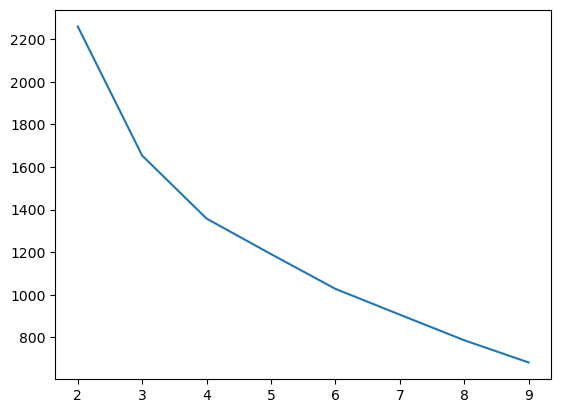

In [50]:
sns.lineplot(x=K, y = ssd)
plt.show()

In [51]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=101)
    kmeans.fit(x_scaled)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(x_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.8538313569568531
For n_clusters=3, the silhouette score is 0.8313323249885186
For n_clusters=4, the silhouette score is 0.471123990782021
For n_clusters=5, the silhouette score is 0.44294709020803924
For n_clusters=6, the silhouette score is 0.43032960327727804
For n_clusters=7, the silhouette score is 0.4449840185921791
For n_clusters=8, the silhouette score is 0.41195115410861644
